In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap,cm
from matplotlib import rcParams
from matplotlib.collections import LineCollection
%matplotlib inline

/home/parallels/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# GroupBy技术

In [2]:
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'data2':np.random.randn(5)})

In [3]:
df

,data1,data2,key1,key2
0,-0.322593,-0.484145,a,one
1,-0.018317,1.088316,a,two
2,-1.139659,-2.376703,b,one
3,-0.860662,-1.342362,b,two
4,1.456291,0.443982,a,one


In [4]:
grouped = df['data1'].groupby(df['key1'])

In [6]:
grouped.mean()

key1
a    0.371793
b   -1.000160
Name: data1, dtype: float64

In [7]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()

In [8]:
means

key1  key2
a     one     0.566849
      two    -0.018317
b     one    -1.139659
      two    -0.860662
Name: data1, dtype: float64

In [9]:
means.unstack()

key2,one,two
key1,,
a,0.566849,-0.018317
b,-1.139659,-0.860662


In [10]:
states = np.array(['Ohio','California','California','Ohio','Ohio'])

In [11]:
years = np.array([2005,2005,2006,2005,2006])

In [12]:
df['data1'].groupby([states, years]).mean()

California  2005   -0.018317
            2006   -1.139659
Ohio        2005   -0.591627
            2006    1.456291
Name: data1, dtype: float64

In [13]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.371793,0.349384
b,-1.000160,-1.859532


In [14]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.566849 -0.020082
     two  -0.018317  1.088316
b    one  -1.139659 -2.376703
     two  -0.860662 -1.342362

In [15]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## 对分组进行迭代 

In [27]:
for name, group in df.groupby('key1'):
    print name
    print group

      data1     data2 key1 key2
0 -0.322593 -0.484145    a  one
1 -0.018317  1.088316    a  two
4  1.456291  0.443982    a  one
      data1     data2 key1 key2
2 -1.139659 -2.376703    b  one
3 -0.860662 -1.342362    b  two


In [17]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print k1,k2
    print group

a one
      data1     data2 key1 key2
0 -0.322593 -0.484145    a  one
4  1.456291  0.443982    a  one
a two
      data1     data2 key1 key2
1 -0.018317  1.088316    a  two
b one
      data1     data2 key1 key2
2 -1.139659 -2.376703    b  one
b two
      data1     data2 key1 key2
3 -0.860662 -1.342362    b  two


In [18]:
pieces = dict(list(df.groupby('key1')))
pieces

{'a':       data1     data2 key1 key2
 0 -0.322593 -0.484145    a  one
 1 -0.018317  1.088316    a  two
 4  1.456291  0.443982    a  one, 'b':       data1     data2 key1 key2
 2 -1.139659 -2.376703    b  one
 3 -0.860662 -1.342362    b  two}

In [19]:
pieces['b']

,data1,data2,key1,key2
2,-1.139659,-2.376703,b,one
3,-0.860662,-1.342362,b,two


In [20]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [21]:
grouped = df.groupby(df.dtypes, axis=1)

In [22]:
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.322593 -0.484145
 1 -0.018317  1.088316
 2 -1.139659 -2.376703
 3 -0.860662 -1.342362
 4  1.456291  0.443982, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [25]:
type('0')

str

## 选取一个或一组列

In [28]:
df.groupby('key1')['data1']

In [29]:
df.groupby('key1')[['data1']]

In [31]:
df['data1'].groupby(df['key1'])

In [32]:
df[['data1']].groupby(df['key1'])

In [33]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.020082
     two   1.088316
b    one  -2.376703
     two  -1.342362

In [34]:
s_grouped = df.groupby(['key1','key2'])['data2']

In [35]:
s_grouped.mean()

key1  key2
a     one    -0.020082
      two     1.088316
b     one    -2.376703
      two    -1.342362
Name: data2, dtype: float64

## 通过字典或Series进行分组

In [36]:
people = DataFrame(np.random.randn(5,5),
                  columns=['a','b','c','d','e'],
                  index=['Joe','Steve','Wes','Jim','Travis'])

In [37]:
people.loc[2:3,['b','c']] = np.nan

In [38]:
people

,a,b,c,d,e
Joe,0.749036,-0.137368,-0.687160,0.253510,-1.612417
Steve,0.458679,0.581561,-1.387829,1.517505,-0.104534
Wes,-0.993492,NaN,NaN,-0.210341,0.461611
Jim,1.707641,1.373264,-0.721807,0.783774,-0.736994
Travis,1.708499,-0.312974,0.631958,0.399702,2.646879


In [39]:
mapping = {'a':'red','b':'red','c':'blue',
          'd':'blue','e':'red','f':'orange'}

In [41]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,-0.433650,-1.000749
Steve,0.129676,0.935706
Wes,-0.210341,-0.531881
Jim,0.061967,2.343911
Travis,1.031661,4.042403


In [42]:
map_series = Series(mapping)

In [43]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## 通过函数进行分组

In [44]:
people.groupby(len).sum()

,a,b,c,d,e
3,1.463184,1.235896,-1.408967,0.826942,-1.887799
5,0.458679,0.581561,-1.387829,1.517505,-0.104534
6,1.708499,-0.312974,0.631958,0.399702,2.646879


In [52]:
people

,a,b,c,d,e
Joe,0.749036,-0.137368,-0.687160,0.253510,-1.612417
Steve,0.458679,0.581561,-1.387829,1.517505,-0.104534
Wes,-0.993492,NaN,NaN,-0.210341,0.461611
Jim,1.707641,1.373264,-0.721807,0.783774,-0.736994
Travis,1.708499,-0.312974,0.631958,0.399702,2.646879


In [45]:
key_list = ['one','one','one','two','two']

In [46]:
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one -0.993492 -0.137368 -0.687160 -0.210341 -1.612417
  two  1.707641  1.373264 -0.721807  0.783774 -0.736994
5 one  0.458679  0.581561 -1.387829  1.517505 -0.104534
6 two  1.708499 -0.312974  0.631958  0.399702  2.646879

In [48]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                   [1,3,5,1,3]],names=['cty','tensor'])

In [49]:
hief_df = DataFrame(np.random.randn(4,5), columns=columns)

In [50]:
hief_df

cty           US                            JP          
tensor         1         3         5         1         3
0      -1.877722 -0.719762 -1.369107 -1.787890 -0.059901
1       2.098504 -2.429580  1.162076  0.240621 -0.817249
2      -1.070924 -0.233749 -1.141964 -0.784471  1.688448
3      -1.835040 -0.623326 -0.224056  0.250443 -0.539508

In [51]:
hief_df.groupby(level='cty',axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


# 数据聚合

In [53]:
df

,data1,data2,key1,key2
0,-0.322593,-0.484145,a,one
1,-0.018317,1.088316,a,two
2,-1.139659,-2.376703,b,one
3,-0.860662,-1.342362,b,two
4,1.456291,0.443982,a,one


In [54]:
grouped = df.groupby('key1')

In [55]:
grouped['data1'].quantile(0.9)

key1
a    1.161369
b   -0.888561
Name: data1, dtype: float64

In [56]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [57]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.778884,1.572461
b,0.278997,1.034341


In [58]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.371793  0.951444 -0.322593 -0.170455 -0.018317  0.718987   
b      2.0 -1.000160  0.197281 -1.139659 -1.069909 -1.000160 -0.930411   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.456291   3.0  0.349384  0.790487 -0.484145 -0.020082  0.443982   
b    -0.860662   2.0 -1.859532  0.731389 -2.376703 -2.118117 -1.859532   

                          
           75%       max  
key1                      
a     0.766149  1.088316  
b    -1.600947 -1.342362

In [59]:
tips = pd.read_csv('ch08/tips.csv')

In [60]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

## 面向列的多函数应用

In [63]:
grouped_pct = tips.groupby(['sex','smoker'])

In [64]:
grouped_pct.agg('mean')

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

In [74]:
grouped_pct.mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

In [65]:
grouped_pct.agg(['mean','std',peak_to_peak])

total_bill                              tip            \
                    mean       std peak_to_peak      mean       std   
sex    smoker                                                         
Female No      18.105185  7.286455        28.58  2.773519  1.128425   
       Yes     17.977879  9.189751        41.23  2.931515  1.219916   
Male   No      19.791237  8.726566        40.82  3.113402  1.489559   
       Yes     22.284500  9.911845        43.56  3.051167  1.500120   

                                size                          tip_pct  \
              peak_to_peak      mean       std peak_to_peak      mean   
sex    smoker                                                           
Female No             4.20  2.592593  1.073146            5  0.156921   
       Yes            5.50  2.242424  0.613917            3  0.182150   
Male   No             7.75  2.711340  0.989094            4  0.160669   
       Yes            9.00  2.500000  0.892530            4  0.152771   

                                      
                    std peak_to_peak  
sex    smoker                         
Female No      0.036421     0.195876  
       Yes     0.071595     0.360233  
Male   No      0.041849     0.220186  
       Yes     0.090588     0.674707

In [66]:
grouped_pct.agg([('foo','mean'),('bar',np.std)])

total_bill                 tip                size            \
                     foo       bar       foo       bar       foo       bar   
sex    smoker                                                                
Female No      18.105185  7.286455  2.773519  1.128425  2.592593  1.073146   
       Yes     17.977879  9.189751  2.931515  1.219916  2.242424  0.613917   
Male   No      19.791237  8.726566  3.113402  1.489559  2.711340  0.989094   
       Yes     22.284500  9.911845  3.051167  1.500120  2.500000  0.892530   

                tip_pct            
                    foo       bar  
sex    smoker                      
Female No      0.156921  0.036421  
       Yes     0.182150  0.071595  
Male   No      0.160669  0.041849  
       Yes     0.152771  0.090588

In [67]:
functions = ['count','mean','max']

In [68]:
result = grouped['tip_pct','total_bill'].agg(functions)

In [69]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [70]:
ftuples = [('Durchschnitt','mean'),('Abweichung',np.var)]

In [71]:
grouped['tip_pct','total_bill'].agg(ftuples)

tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [72]:
grouped.agg({'tip':np.max,'size':'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [73]:
grouped.agg({'tip_pct':['min','max','mean','std'],'size':'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

In [77]:
tips.groupby(['sex','smoker'],as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


In [78]:
tips.groupby(['sex','smoker']).mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

# 分组级运算和转换

In [79]:
df

,data1,data2,key1,key2
0,-0.322593,-0.484145,a,one
1,-0.018317,1.088316,a,two
2,-1.139659,-2.376703,b,one
3,-0.860662,-1.342362,b,two
4,1.456291,0.443982,a,one


In [80]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [92]:
k1_means_t = df.groupby('key1').transform(np.mean).add_prefix('mean_')

In [93]:
k1_means_t

,mean_data1,mean_data2
0,0.371793,0.349384
1,0.371793,0.349384
2,-1.000160,-1.859532
3,-1.000160,-1.859532
4,0.371793,0.349384


In [95]:
pd.merge(df, k1_means_t,right_index=True,left_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.322593,-0.484145,a,one,0.371793,0.349384
1,-0.018317,1.088316,a,two,0.371793,0.349384
2,-1.139659,-2.376703,b,one,-1.000160,-1.859532
3,-0.860662,-1.342362,b,two,-1.000160,-1.859532
4,1.456291,0.443982,a,one,0.371793,0.349384


In [81]:
k1_means

,mean_data1,mean_data2
key1,,
a,0.371793,0.349384
b,-1.000160,-1.859532


In [82]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.322593,-0.484145,a,one,0.371793,0.349384
1,-0.018317,1.088316,a,two,0.371793,0.349384
4,1.456291,0.443982,a,one,0.371793,0.349384
2,-1.139659,-2.376703,b,one,-1.000160,-1.859532
3,-0.860662,-1.342362,b,two,-1.000160,-1.859532


In [83]:
key = ['one','two','one','two','one']

In [90]:
people

,a,b,c,d,e
Joe,0.749036,-0.137368,-0.687160,0.253510,-1.612417
Steve,0.458679,0.581561,-1.387829,1.517505,-0.104534
Wes,-0.993492,NaN,NaN,-0.210341,0.461611
Jim,1.707641,1.373264,-0.721807,0.783774,-0.736994
Travis,1.708499,-0.312974,0.631958,0.399702,2.646879


In [84]:
people.groupby(key).mean()

,a,b,c,d,e
one,0.488014,-0.225171,-0.027601,0.147624,0.498691
two,1.083160,0.977412,-1.054818,1.150639,-0.420764


In [85]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,0.488014,-0.225171,-0.027601,0.147624,0.498691
Steve,1.083160,0.977412,-1.054818,1.150639,-0.420764
Wes,0.488014,-0.225171,-0.027601,0.147624,0.498691
Jim,1.083160,0.977412,-1.054818,1.150639,-0.420764
Travis,0.488014,-0.225171,-0.027601,0.147624,0.498691


In [86]:
def demean(arr):
    return arr-arr.mean()

In [87]:
demeaned = people.groupby(key).transform(demean)

In [88]:
demeaned

,a,b,c,d,e
Joe,0.261022,0.087803,-0.659559,0.105886,-2.111108
Steve,-0.624481,-0.395851,-0.333011,0.366865,0.316230
Wes,-1.481506,NaN,NaN,-0.357965,-0.037080
Jim,0.624481,0.395851,0.333011,-0.366865,-0.316230
Travis,1.220485,-0.087803,0.659559,0.252079,2.148188


In [89]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
two,5.551115e-17,0.0,-5.551115e-17,5.551115e-17,2.775558e-17


## apply:一般性的“拆分-应用-合并”

In [104]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [105]:
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [106]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [107]:
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [109]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [110]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [111]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [113]:
f = lambda x:x.describe()
grouped.apply(f)

total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.270000   2.880000   2.000000   0.173913
              75%     22.120000   3.500000   2.000000   0.198216
              max     44.300000   6.500000   4.000000   0.416667
Male   No     count   97.000000  97.000000  97.000000  97.000000
              mean    19.791237   3.113402   2.711340   0.160669
              std      8.726566   1.489559   0.989094   0.041849
              min      7.510000   1.250000   2.000000   0.071804
              25%     13.810000   2.000000   2.000000   0.131810
              50%     18.240000   2.740000   2.000000   0.157604
              75%     22.820000   3.710000   3.000000   0.186220
              max     48.330000   9.000000   6.000000   0.291990
       Yes    count   60.000000  60.000000  60.000000  60.000000
              mean    22.284500   3.051167   2.500000   0.152771
              std      9.911845   1.500120   0.892530   0.090588
              min      7.250000   1.000000   1.000000   0.035638
              25%     15.272500   2.000000   2.000000   0.101845
              50%     20.390000   3.000000   2.000000   0.141015
              75%     28.572500   3.820000   3.000000   0.191697
              max     50.810000  10.000000   5.000000   0.710345

In [114]:
tips.groupby('smoker',group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [115]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

## 分位数和桶分析

In [116]:
frame = DataFrame({'data1':np.random.randn(1000),
                  'data2':np.random.randn(1000)})

In [117]:
factor = pd.cut(frame.data1, 4)

In [118]:
factor[:10]

0    (-2.009, -0.326]
1      (1.358, 3.042]
2     (-0.326, 1.358]
3    (-2.009, -0.326]
4     (-0.326, 1.358]
5     (-0.326, 1.358]
6     (-0.326, 1.358]
7     (-0.326, 1.358]
8    (-2.009, -0.326]
9    (-2.009, -0.326]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.7, -2.009] < (-2.009, -0.326] < (-0.326, 1.358] < (1.358, 3.042]]

In [119]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),
           'count':group.count(),'mean':group.mean()}

In [120]:
grouped = frame.data2.groupby(factor)

In [121]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.7, -2.009]",27.0,1.101384,-0.063129,-1.388670
"(-2.009, -0.326]",327.0,2.307447,-0.033062,-3.122886
"(-0.326, 1.358]",567.0,2.374967,-0.015091,-2.924498
"(1.358, 3.042]",79.0,2.064181,-0.018334,-2.501546


In [122]:
grouping = pd.qcut(frame.data1, 10, labels=False)

In [123]:
grouped = frame.data2.groupby(grouping)

In [124]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.305203,0.009229,-1.781226
1,100.0,2.180809,-0.086154,-2.183485
2,100.0,2.307447,0.021429,-2.701641
3,100.0,2.202161,-0.089253,-3.122886
4,100.0,2.204395,-0.039808,-2.829772
5,100.0,1.883792,-0.087919,-2.249371
6,100.0,2.231584,0.053742,-2.404568
7,100.0,2.374967,-0.042558,-2.924498
8,100.0,2.118332,0.035080,-2.535596


## 实例1

In [125]:
s = Series(np.random.randn(6))

In [139]:
s[::2] = np.nan

In [137]:
s

0         NaN
1   -0.874684
2         NaN
3   -1.190856
4         NaN
5   -0.297865
dtype: float64

In [128]:
s.fillna(s.mean())

0   -0.787802
1   -0.874684
2   -0.787802
3   -1.190856
4   -0.787802
5   -0.297865
dtype: float64

In [129]:
states = ['Ohio','New York', 'Vermont','Florida',
          'Oregon','Nevada','California','Idaho']

In [130]:
group_key = ['East']*4 + ['West']*4

In [131]:
data = Series(np.random.randn(8), index=states)

In [132]:
data[['Vermont','Nevada','Idaho']] = np.nan

In [133]:
data.groupby(group_key).mean()

East   -0.622130
West   -0.412875
dtype: float64

In [134]:
fill_mean = lambda g : g.fillna(g.mean())

In [135]:
data.groupby(group_key).apply(fill_mean)

Ohio         -0.721948
New York      0.147232
Vermont      -0.622130
Florida      -1.291674
Oregon       -1.006830
Nevada       -0.412875
California    0.181080
Idaho        -0.412875
dtype: float64

In [136]:
fill_values = {'East':0.5,'West':-1}

In [140]:
fill_func = lambda g: g.fillna(fill_values[g.name])

In [141]:
data.groupby(group_key).apply(fill_func)

Ohio         -0.721948
New York      0.147232
Vermont       0.500000
Florida      -1.291674
Oregon       -1.006830
Nevada       -1.000000
California    0.181080
Idaho        -1.000000
dtype: float64

## 实例2

In [142]:
suts = ['H','S','C','D']
card_val = (range(1,11)+[10]*3)*4
base_names = ['A']+range(2,11)+['J','K','Q']

In [143]:
[10]*3

[10, 10, 10]

In [144]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [145]:
cards = []

In [146]:
for suit in ['H','S','C','D']:
    cards.extend(str(num)+suit for num in base_names)

In [147]:
deck = Series(card_val, index=cards)

In [148]:
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [149]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

In [150]:
draw(deck)

QD    10
3D     3
4C     4
KD    10
2D     2
dtype: int64

In [151]:
get_suit = lambda card:card[-1]
deck.groupby(get_suit).apply(draw, n=2)

C  10C    10
   AC      1
D  QD     10
   KD     10
H  JH     10
   10H    10
S  7S      7
   5S      5
dtype: int64

In [153]:
deck.groupby(get_suit,group_keys=False).apply(draw,n=2)

5C     5
AC     1
3D     3
QD    10
7H     7
5H     5
4S     4
6S     6
dtype: int64

## 分组加权平均数和相关系数

In [155]:
df = DataFrame({'category':['a','a','a','a','b','b','b','b'],
               'data':np.random.randn(8),
               'weights':np.random.randn(8)})

In [156]:
df

,category,data,weights
0,a,-0.102579,-0.053797
1,a,1.068241,0.226439
2,a,0.574669,0.805850
3,a,1.048497,2.163483
4,b,0.821073,-0.962914
5,b,0.393369,0.245479
6,b,-0.628022,-0.587956
7,b,1.060473,-0.115278


In [157]:
grouped = df.groupby('category')

In [158]:
get_wavg= lambda g: np.average(g['data'],weights=g['weights'])

In [159]:
grouped.apply(get_wavg)

category
a    0.948102
b    0.314682
dtype: float64

In [161]:
close_px = pd.read_csv('ch09/stock_px.csv',
                       parse_dates=True,index_col=0)

In [162]:
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33
1990-02-08,5.04,7.71,2.92,17.86,4.46,0.51,6.22,332.96,6.35
1990-02-09,5.06,8.00,2.94,17.82,4.49,0.52,6.24,333.62,6.37
1990-02-12,4.96,7.94,2.89,17.58,4.46,0.52,6.23,330.08,6.22
1990-02-13,4.91,8.06,2.88,17.95,4.43,0.52,6.09,331.02,6.23
1990-02-14,4.94,8.00,2.89,18.04,4.47,0.52,6.10,332.01,6.20


In [163]:
rets = close_px.pct_change().dropna()

In [164]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [165]:
by_year = rets.groupby(lambda x:x.year)

In [169]:
rets.index.dtype

dtype('<M8[ns]')

In [170]:
by_year.apply(spx_corr)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990,0.595024,0.545067,0.752187,0.738361,0.801145,0.586691,0.783168,1.0,0.517586
1991,0.453574,0.365315,0.759607,0.557046,0.646401,0.524225,0.641775,1.0,0.569335
1992,0.398180,0.498732,0.632685,0.262232,0.515740,0.492345,0.473871,1.0,0.318408
1993,0.259069,0.238578,0.447257,0.211269,0.451503,0.425377,0.385089,1.0,0.318952
1994,0.428549,0.268420,0.572996,0.385162,0.372962,0.436585,0.450516,1.0,0.395078
1995,0.291532,0.161829,0.519126,0.416390,0.315733,0.453660,0.413144,1.0,0.368752
1996,0.292344,0.191482,0.750724,0.388497,0.569232,0.564015,0.421477,1.0,0.538736
1997,0.564427,0.211435,0.827512,0.646823,0.703538,0.606171,0.509344,1.0,0.695653
1998,0.533802,0.379883,0.815243,0.623982,0.591988,0.698773,0.494213,1.0,0.369264
1999,0.099033,0.425584,0.710928,0.486167,0.517061,0.631315,0.336593,1.0,0.315383


In [171]:
by_year.apply(lambda g:g['AAPL'].corr(g['MSFT']))

1990    0.408271
1991    0.266807
1992    0.450592
1993    0.236917
1994    0.361638
1995    0.258642
1996    0.147539
1997    0.196144
1998    0.364106
1999    0.329484
2000    0.275298
2001    0.563156
2002    0.571095
2003    0.486262
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

## 面向分组的线性回归

In [173]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result=sm.OLS(Y,X).fit()
    return result.params

In [175]:
by_year.apply(regress, 'AAPL')

,SPX,intercept
1990,1.512772,0.001395
1991,1.187351,0.000396
1992,1.832427,0.000164
1993,1.390470,-0.002657
1994,1.190277,0.001617
1995,0.858818,-0.001423
1996,0.829389,-0.001791
1997,0.749928,-0.001901
1998,1.164582,0.004075
1999,1.384989,0.003273


# 透视图和交叉表

In [179]:
tips.pivot_table(index=['sex','smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [181]:
tips.groupby(['sex','smoker']).apply(np.mean)

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

In [180]:
tips.pivot_table(['tip_pct', 'size'], index=['sex','day'],
                columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [196]:
tips.groupby(['sex','day','smoker']).apply(np.mean).unstack(level=2)

total_bill                  tip                size            \
smoker              No        Yes        No       Yes        No       Yes   
sex    day                                                                  
Female Fri   19.365000  12.654286  3.125000  2.682857  2.500000  2.000000   
       Sat   19.003846  20.266667  2.724615  2.868667  2.307692  2.200000   
       Sun   20.824286  16.540000  3.329286  3.500000  3.071429  2.500000   
       Thur  16.014400  19.218571  2.459600  2.990000  2.480000  2.428571   
Male   Fri   17.475000  20.452500  2.500000  2.741250  2.000000  2.125000   
       Sat   19.929063  21.837778  3.256563  2.879259  2.656250  2.629630   
       Sun   20.403256  26.141333  3.115349  3.521333  2.883721  2.600000   
       Thur  18.486500  19.171000  2.941500  3.058000  2.500000  2.300000   

              tip_pct            
smoker             No       Yes  
sex    day                       
Female Fri   0.165296  0.209129  
       Sat   0.147993  0.163817  
       Sun   0.165710  0.237075  
       Thur  0.155971  0.163073  
Male   Fri   0.138005  0.144730  
       Sat   0.162132  0.139067  
       Sun   0.158291  0.173964  
       Thur  0.165706  0.164417

In [198]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'],
                columns='smoker',margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [199]:
tips.pivot_table('tip_pct',index=['sex','smoker'],columns='day',
                aggfunc=len,margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [200]:
tips.pivot_table('size',index=['time','sex','smoker'],
                columns='day',aggfunc='sum',fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

## 交叉表

In [201]:
data

Ohio         -0.721948
New York      0.147232
Vermont            NaN
Florida      -1.291674
Oregon       -1.006830
Nevada             NaN
California    0.181080
Idaho              NaN
dtype: float64

In [2]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')

/home/parallels/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [4]:
fec.loc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [5]:
unique_cands = fec.cand_nm.unique()

In [6]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [7]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [8]:
parties = {'Bachmann, Michelle':'Republican',
          'Cain, Herman':'Republican',
          'Gingrich, Newt':'Republican',
          'Huntsman, Jon': 'Republican',
          'Johnson, Gary Earl': 'Republican',
          'McCotter, Thaddeus G':'Republican',
          'Obama, Barack':'Democrat',
          'Paul, Ron':'Republican',
          'Pawlenty, Timothy':'Republican',
          'Perry, Rick':'Republican',
          "Roemer, Charles E. 'Buddy' III":'Republican',
          'Romney, Mitt': 'Republican',
          'Santorum, Rick': 'Republican'}

In [9]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [10]:
fec['party'] = fec.cand_nm.map(parties)

In [11]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [12]:
len(fec['party'])

1001731

In [13]:
fec[fec['party'].isnull()]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party


In [14]:
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [15]:
fec = fec[fec.contb_receipt_amt>0]

In [16]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

In [17]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [18]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
    'C.E.O.':'CEO'
}

In [19]:
f = lambda x:occ_mapping.get(x,x)

In [20]:
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [21]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'SELF':'SELF-EMPLOYED',
    'SELF EMPLOYED':'SELF-EMPLOYED'
}

In [22]:
f = lambda x: emp_mapping.get(x,x)

In [23]:
fec.contbr_employer = fec.contbr_employer.map(f)

In [24]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party',aggfunc='sum')

In [25]:
over_2mm = by_occupation[by_occupation.sum(1)>2000000]

In [26]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


In [27]:
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


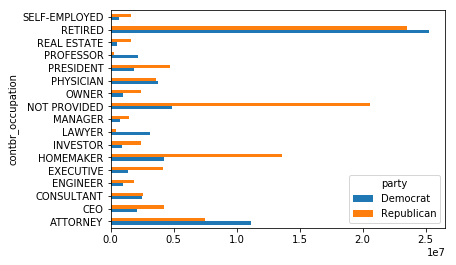

In [28]:
over_2mm.plot(kind='barh')

In [29]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[n:]

In [30]:
grouped = fec_mrbo.groupby('cand_nm')

In [31]:
mygrouped = dict(list(grouped))
mygrouped.keys()

['Romney, Mitt', 'Obama, Barack']

In [32]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  PROFESSOR                                 2165071.08
               CEO                                       2073284.79
               PRESIDENT                                 1878509.95
               NOT EMPLOYED                              1709188.20
               EXECUTIVE                                 1355161.05
               TEACHER                                   1250969.15
               WRITER                                    1084188.88
               OWNER                                     1001567.36
               ENGINEER                                   951525.55
               INVESTOR                                   884133.00
               ARTIST                                     763125.00
               MANAGER                                    762883.22
               SELF-EMPLOYED                              672393.40
               STUDENT                                    6280

In [33]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                
Obama, Barack  SIDLEY AUSTIN LLP                  168254.00
               REFUSED                            149516.07
               DLA PIPER                          148235.00
               HARVARD UNIVERSITY                 131368.94
               IBM                                128490.93
               GOOGLE                             125302.88
               MICROSOFT CORPORATION              108849.00
               KAISER PERMANENTE                  104949.95
               JONES DAY                          103712.50
               STANFORD UNIVERSITY                101630.75
               COLUMBIA UNIVERSITY                 96325.12
               UNIVERSITY OF CHICAGO               88575.00
               AT&T                                88132.12
               US GOVERNMENT                       87689.00
               MORGAN & MORGAN                     87250.00
               VERIZON                             85

In [34]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])

In [35]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [36]:
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [37]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [38]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [39]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [40]:
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [41]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)

In [42]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


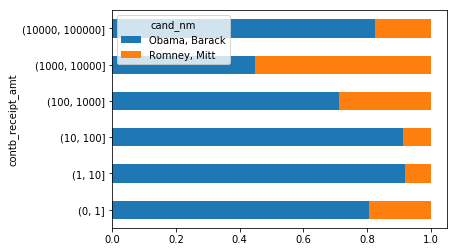

In [43]:
normed_sums[:-2].plot(kind='barh', stacked=True)

In [44]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [45]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [46]:
totals = totals[totals.sum(1)>100000]

In [47]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [48]:
percent = totals.div(totals.sum(1), axis=0)

In [49]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


In [51]:
obama = percent['Obama, Barack']

In [52]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
lllat = 21;urlat=53;lllon=-118;urlon=-62
m = Basemap(ax=ax, projection='stere',
           lon_O=(urlon+lllon)/2,lat_O=(urlat+lllat)/2,
           llcrnrlat=lllat,urcrnrlat=urlat,llcrnrlon=lllon,
           urcrnrlon=urlon,resolution='l')
m.drawcoastlines()
m.drawcountries()

